In [1]:
!pip install pymc3

In [2]:
!pip install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.1 MB/s eta 0:00:00a 0:00:01


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime

In [4]:
# Setting the begining and ending
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)


In [2]:
! pip3 install mxnet-mkl==1.6.0 numpy==1.23.1

ERROR: Could not find a version that satisfies the requirement mxnet-mkl==1.6.0 (from versions: none)
ERROR: No matching distribution found for mxnet-mkl==1.6.0


In [3]:
from numpyro.infer.util import initialize_model
from numpyro.diagnostics import hpdi

In [4]:
!pip install arviz

In [5]:
!pip install numpyro

In [6]:
import jax.numpy as jnp


In [7]:
!pip install yfinance

In [8]:
from jax import random

In [9]:
!pip install --upgrade numpyro


In [16]:
company_list = ['AAPL', 'TSLA', 'MSFT', 'AMZN']

In [17]:
import yfinance as yf



# Setting the begining and ending
from datetime import datetime, timedelta
end_date = datetime.now() - timedelta(days=730)  # 2 years ago
start_date = end_date - timedelta(days=730)  # 4 years ago


In [18]:
for company in company_list:
    globals()[company] = yf.download(company, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
AAPL.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.948204,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.116264,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,67.014961,133587600
2019-12-16,69.250000,70.197502,69.245003,69.964996,68.162148,128186000
2019-12-17,69.892502,70.442497,69.699997,70.102501,68.296120,114158400


In [20]:
TSLA.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-11,23.458668,23.812668,23.406000,23.513332,23.513332,103467000
2019-12-12,23.661333,24.182667,23.548668,23.978666,23.978666,116458500
2019-12-13,24.070000,24.347334,23.642668,23.892668,23.892668,98563500
2019-12-16,24.170000,25.573999,24.166668,25.433332,25.433332,272613000
2019-12-17,25.266001,25.700001,25.059999,25.266001,25.266001,127452000


In [21]:
MSFT.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-11,151.539993,151.869995,150.330002,151.699997,146.183868,18856600
2019-12-12,151.649994,153.440002,151.020004,153.240005,147.667877,24612100
2019-12-13,153.000000,154.889999,152.830002,154.529999,148.911011,23845400
2019-12-16,155.110001,155.899994,154.820007,155.529999,149.874619,24144200
2019-12-17,155.449997,155.710007,154.449997,154.690002,149.065155,25425600


In [22]:
AMZN.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-11,87.083504,87.500000,86.785500,87.435997,87.435997,41952000
2019-12-12,87.500000,88.199997,87.272003,88.016502,88.016502,61918000
2019-12-13,88.250000,88.449501,87.750000,88.046997,88.046997,54914000
2019-12-16,88.349998,88.474998,87.852501,88.460503,88.460503,62904000
2019-12-17,88.900497,89.599998,88.869499,89.532997,89.532997,72888000


In [23]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-12-11 to 2021-12-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       504 non-null    float64
 1   High       504 non-null    float64
 2   Low        504 non-null    float64
 3   Close      504 non-null    float64
 4   Adj Close  504 non-null    float64
 5   Volume     504 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


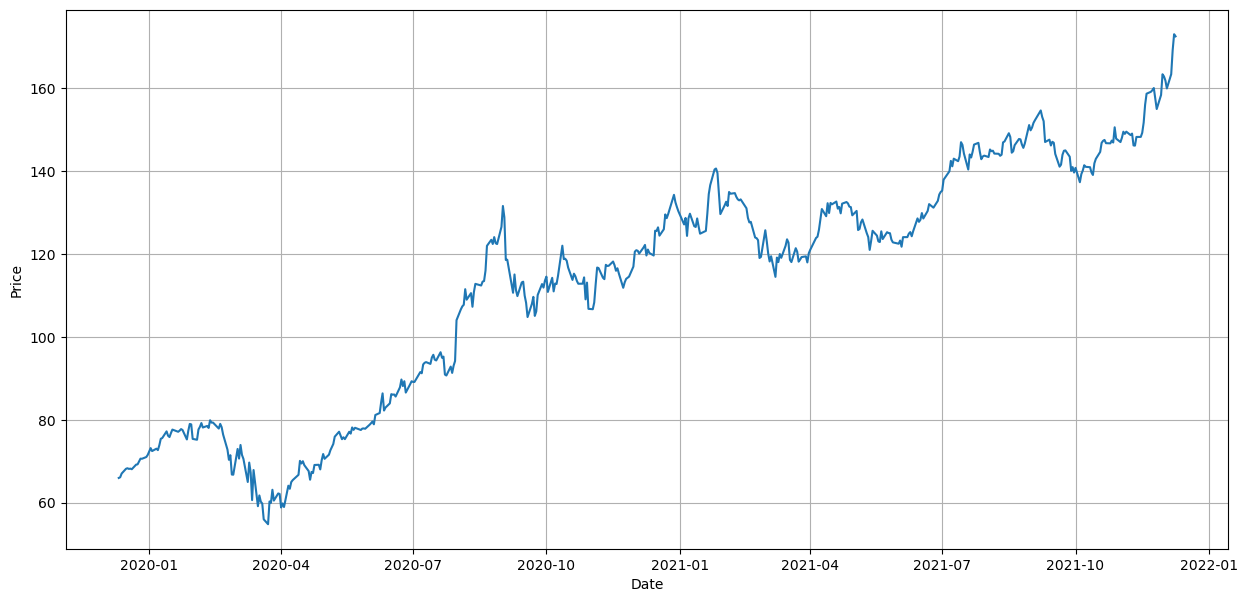

In [24]:
plt.figure(figsize=(15, 7))
plt.plot(AAPL['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

<Axes: xlabel='Date'>

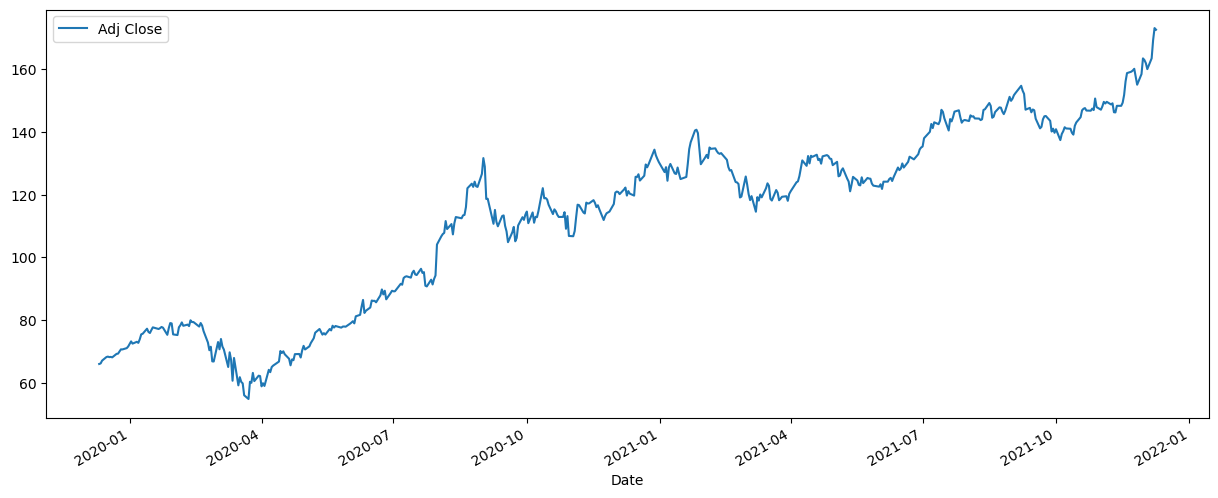

In [25]:
AAPL['Adj Close'].plot(legend=True, figsize=(15, 6))

In [26]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    AAPL[ma_str] = AAPL['Adj Close'].rolling(ma).mean()
    TSLA[ma_str] = TSLA['Adj Close'].rolling(ma).mean()
    MSFT[ma_str] = MSFT['Adj Close'].rolling(ma).mean()
    AMZN[ma_str] = AMZN['Adj Close'].rolling(ma).mean()

In [27]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['Adj Close'])
    plt.plot(company['MA: 10'])
    plt.plot(company['MA: 20'])
    plt.plot(company['MA: 30'])
    
    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close','MA: 10', 'MA: 20', 'MA:30'))
    plt.grid()
    plt.show()

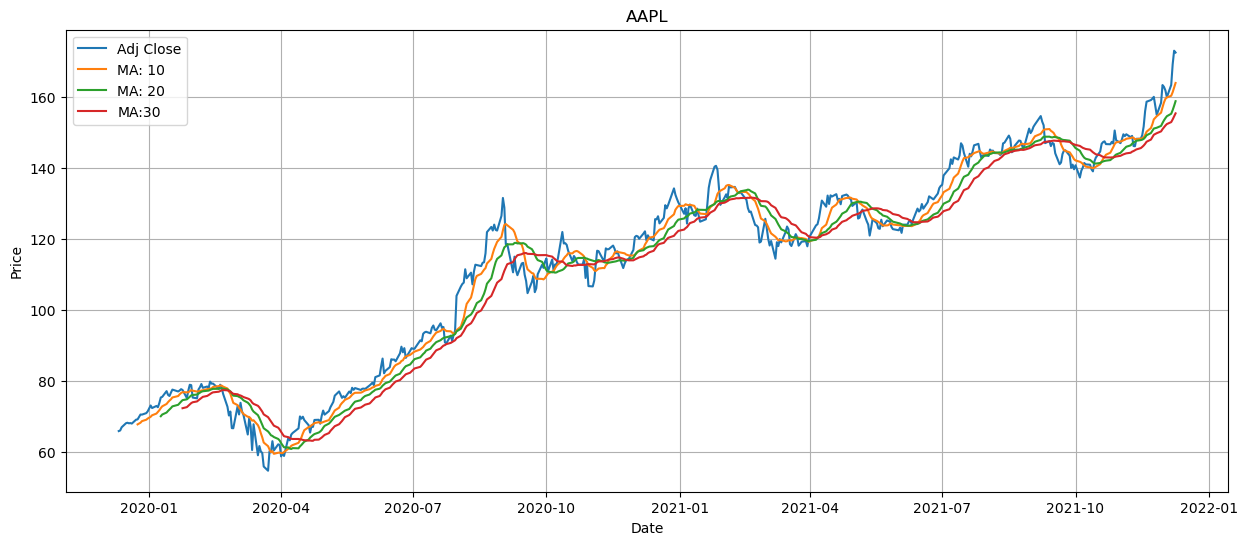

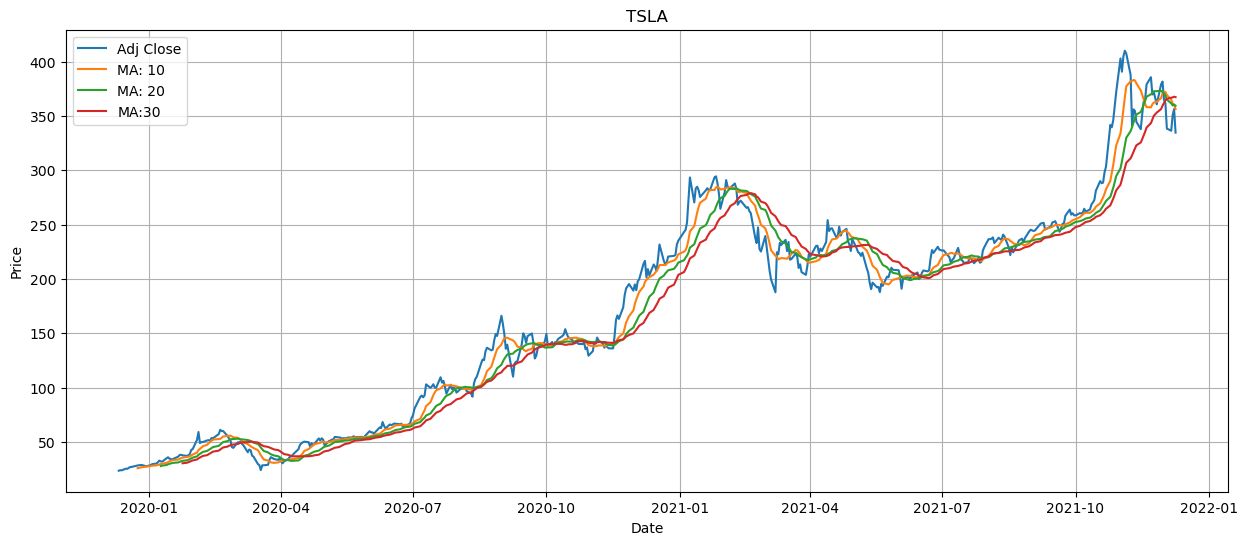

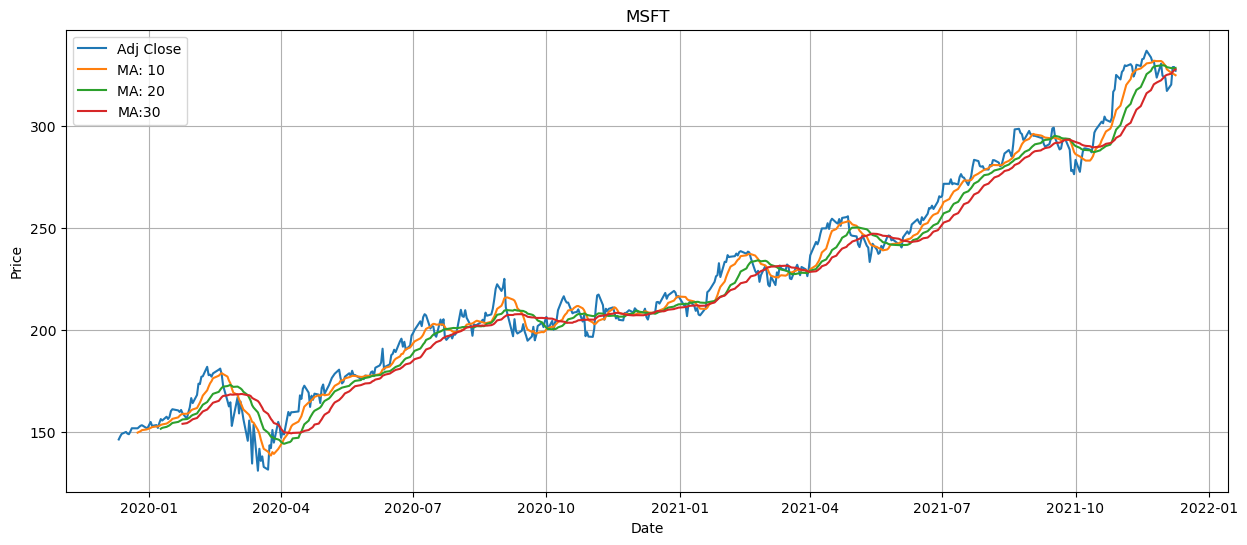

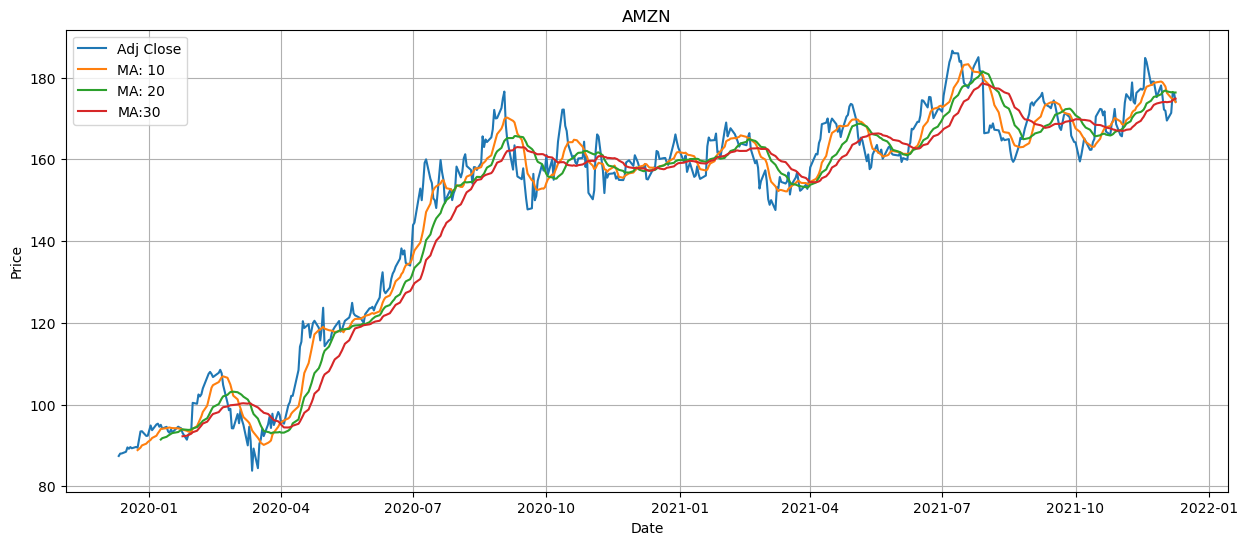

In [29]:
data_list = [AAPL, TSLA, MSFT, AMZN]
for i in range(len(data_list)):   
    plot_graphic(data_list[i], company_list[i])

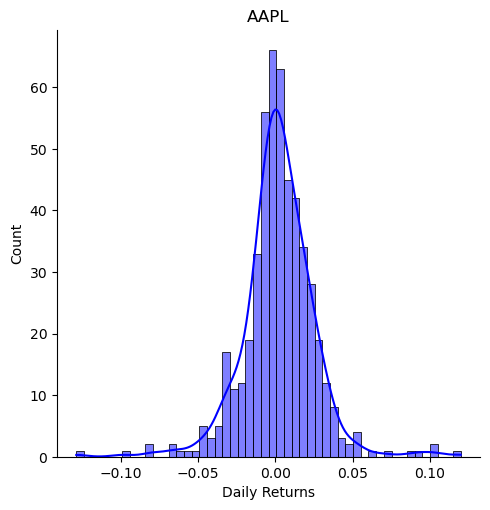

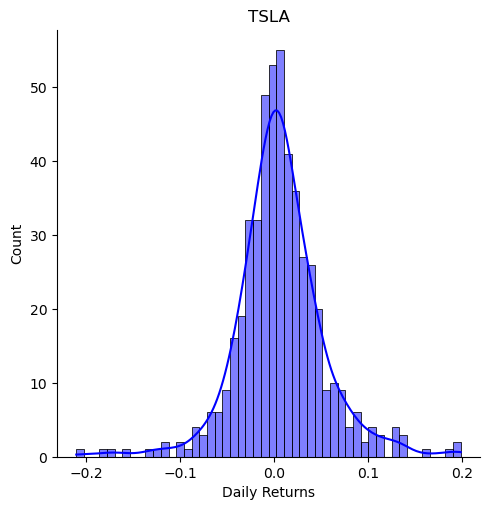

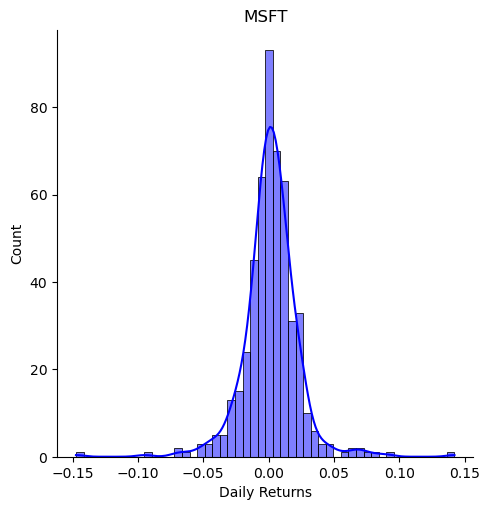

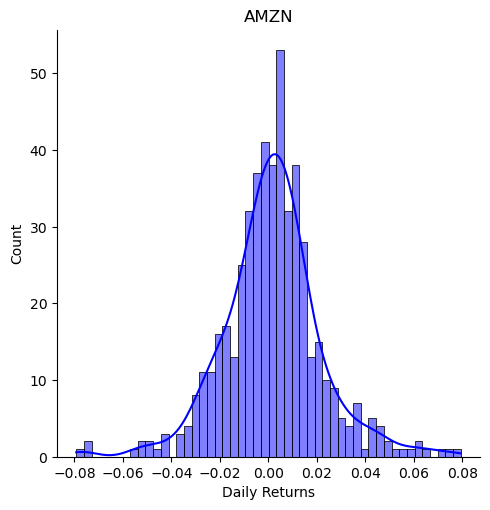

In [30]:
for i in range(len(data_list)):
    data_list[i]['Daily Returns'] = data_list[i]['Adj Close'].pct_change()
    sns.displot(data_list[i]['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company_list[i])
    plt.show()

In [31]:
stock_returns = pd.DataFrame(data=np.array([data['Daily Returns'] for data in data_list]).T, columns=company_list)
stock_returns.head()

,AAPL,TSLA,MSFT,AMZN
0,NaN,NaN,NaN,NaN
1,0.002548,0.019790,0.010152,0.006639
2,0.013593,-0.003586,0.008418,0.000346
3,0.017118,0.064483,0.006471,0.004696
4,0.001965,-0.006579,-0.005401,0.012124


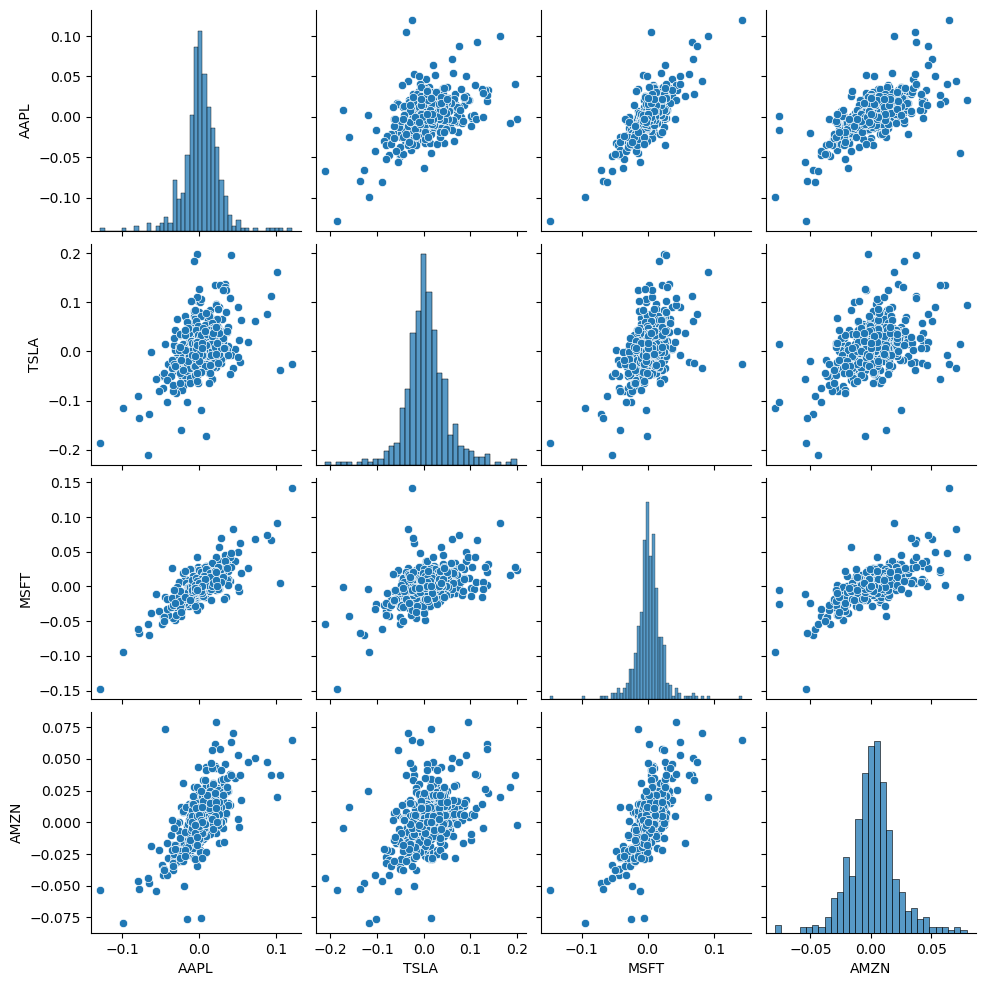

In [32]:
sns.pairplot(stock_returns.dropna())

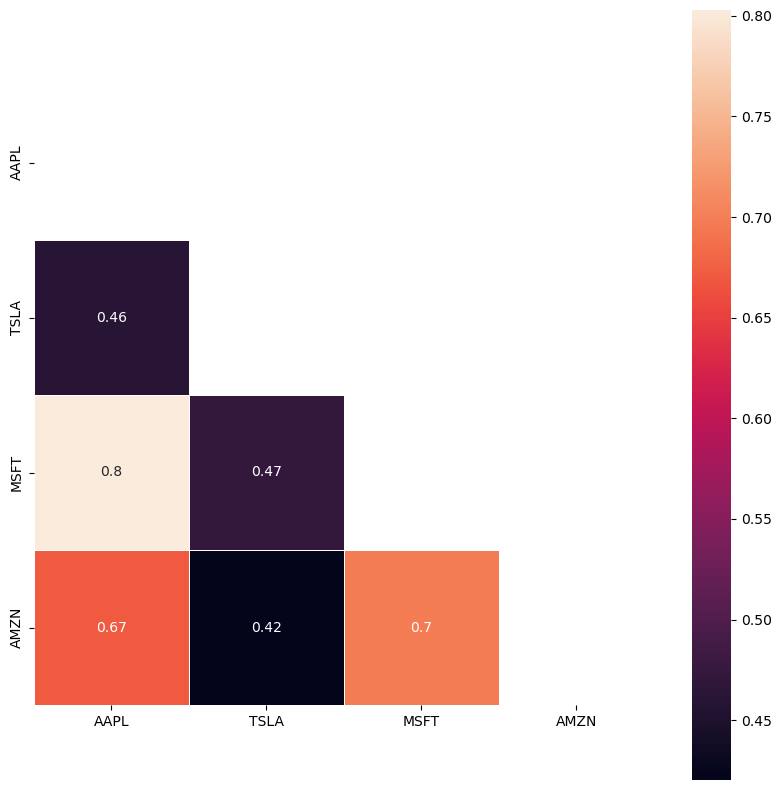

In [33]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [34]:
def draw_jointplot(data):
    grid = sns.PairGrid(data.dropna())
    grid.map_diag(sns.histplot, bins=40, kde=True)
    grid.map_lower(sns.regplot)
    grid.map_upper(sns.kdeplot)

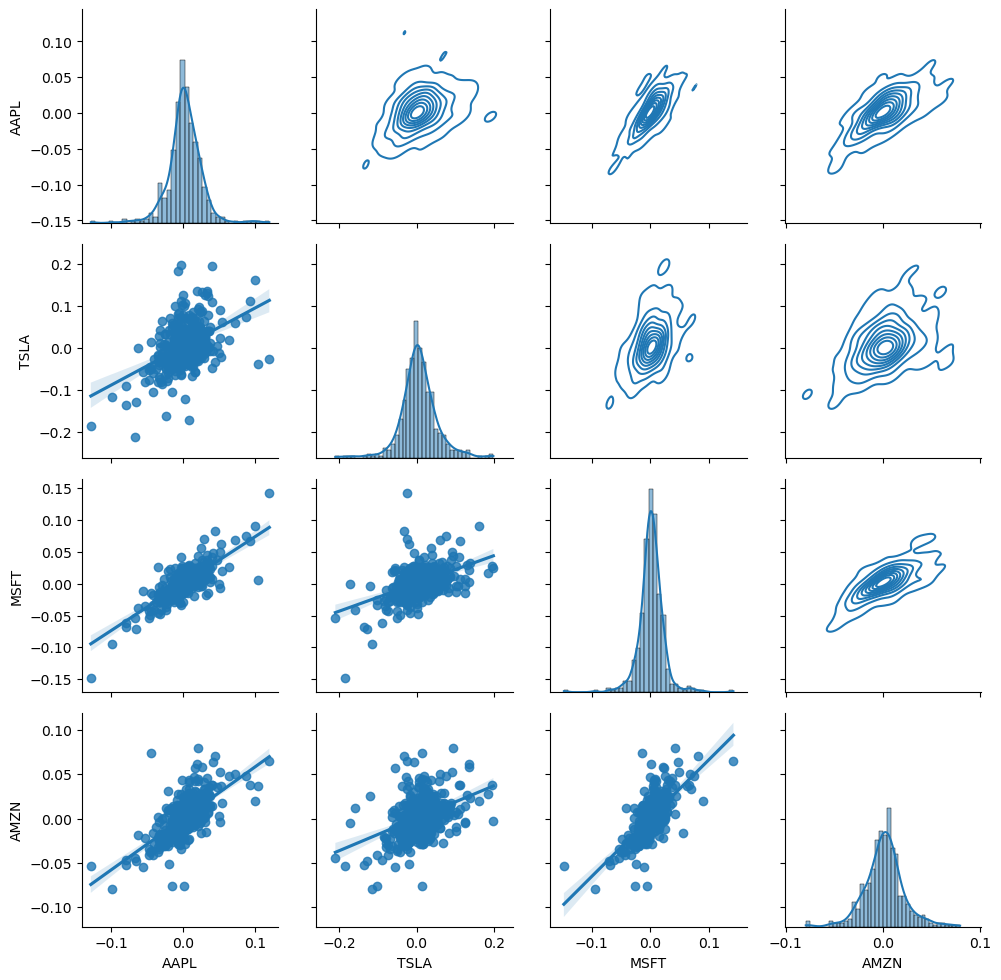

In [35]:
draw_jointplot(stock_returns)

In [36]:
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation 
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

AAPL    0.002190
TSLA    0.006378
MSFT    0.001834
AMZN    0.001576
dtype: float64
          AAPL      TSLA      MSFT      AMZN
AAPL  0.000551  0.000505  0.000405  0.000319
TSLA  0.000505  0.002178  0.000474  0.000398
MSFT  0.000405  0.000474  0.000463  0.000304
AMZN  0.000319  0.000398  0.000304  0.000411


In [37]:
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [38]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)


def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [39]:
combinations = 4000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)

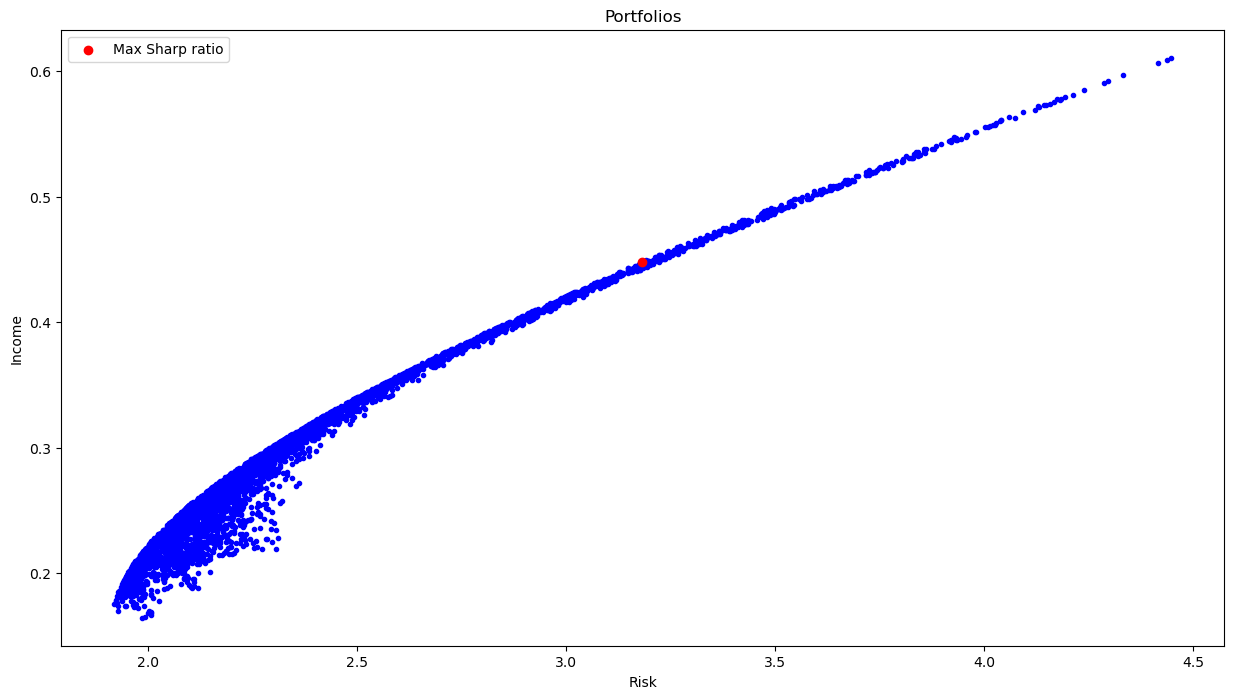

In [40]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [41]:
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

AAPL : 0.3467902668439752
TSLA : 0.5590639777489174
MSFT : 0.017951343869091918
AMZN : 0.07619441153801552


In [42]:
days = 365
dt = 1 / days
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

# Using Monte Carlo GBM (non-Bayesian Inference)

In [43]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [44]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MA: 10,MA: 20,MA: 30,Daily Returns
Date,,,,,,,,,,
2021-12-03,164.020004,164.960007,159.720001,161.839996,160.011734,118023100,159.936600,154.648521,152.439103,-0.011725
2021-12-06,164.289993,167.880005,164.279999,165.320007,163.452454,107497000,160.408214,155.342593,152.994316,0.021503
2021-12-07,169.080002,171.580002,168.339996,171.179993,169.246231,120405400,161.412735,156.367878,153.744301,0.035446
2021-12-08,172.130005,175.960007,170.699997,175.080002,173.102188,116998900,162.764294,157.567671,154.600439,0.022783
2021-12-09,174.910004,176.750000,173.919998,174.559998,172.588043,108923700,164.012038,158.884624,155.454907,-0.002970


Text(0.5, 1.0, 'Monte Carlo analysis for Apple')

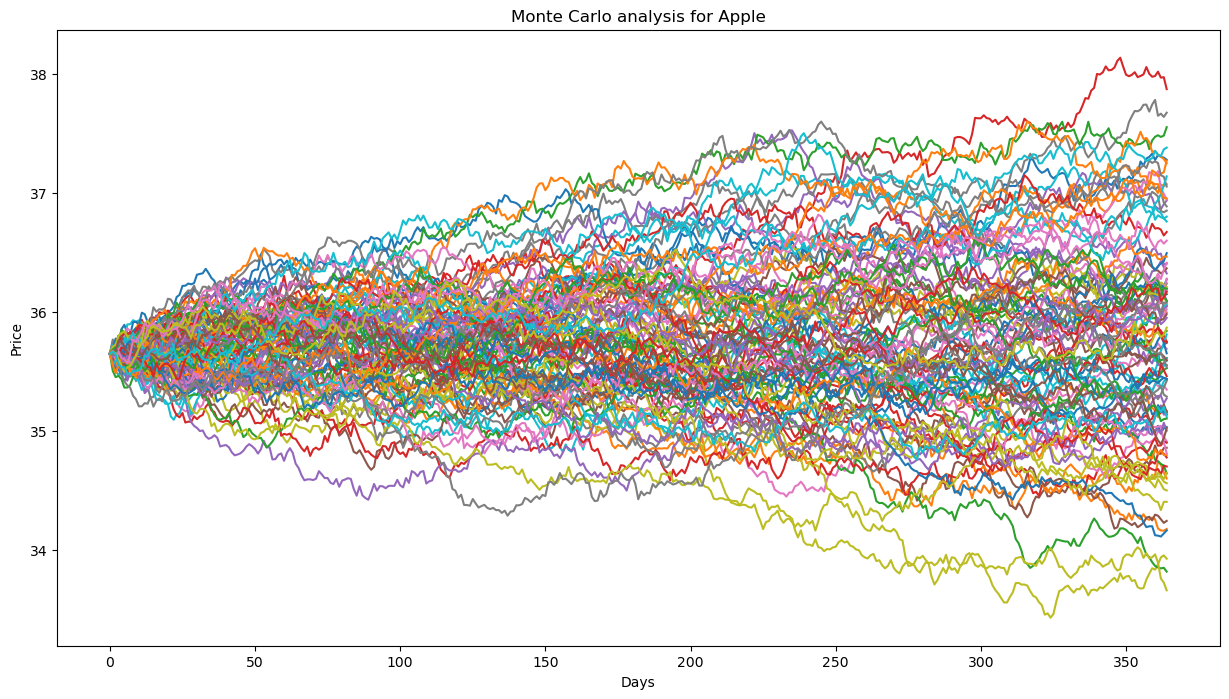

In [45]:
start_price = 35.65
sim = np.zeros(100)

plt.figure(figsize=(15, 8))
for i in range(100):
    result = monte_carlo(start_price, days, mu['AAPL'], sigma['AAPL'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Apple')


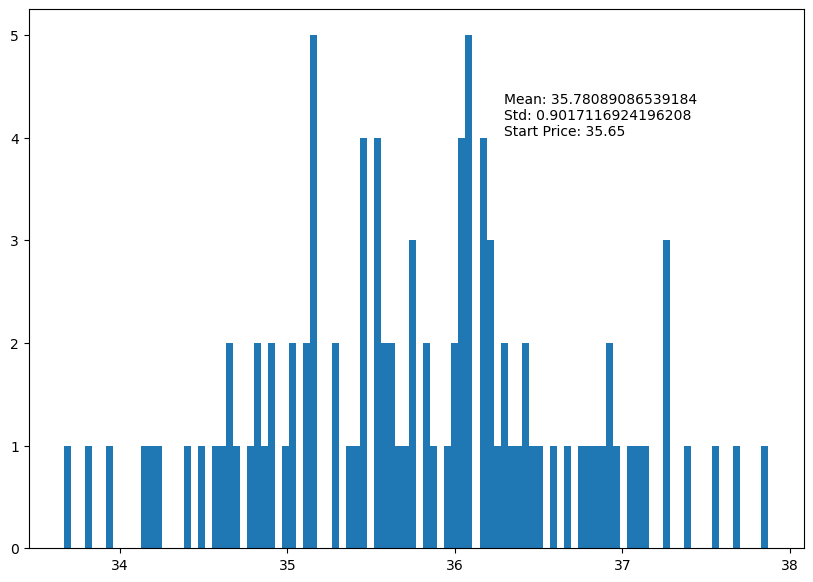

In [46]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Text(0.5, 1.0, 'Monte Carlo analysis for Tesla')

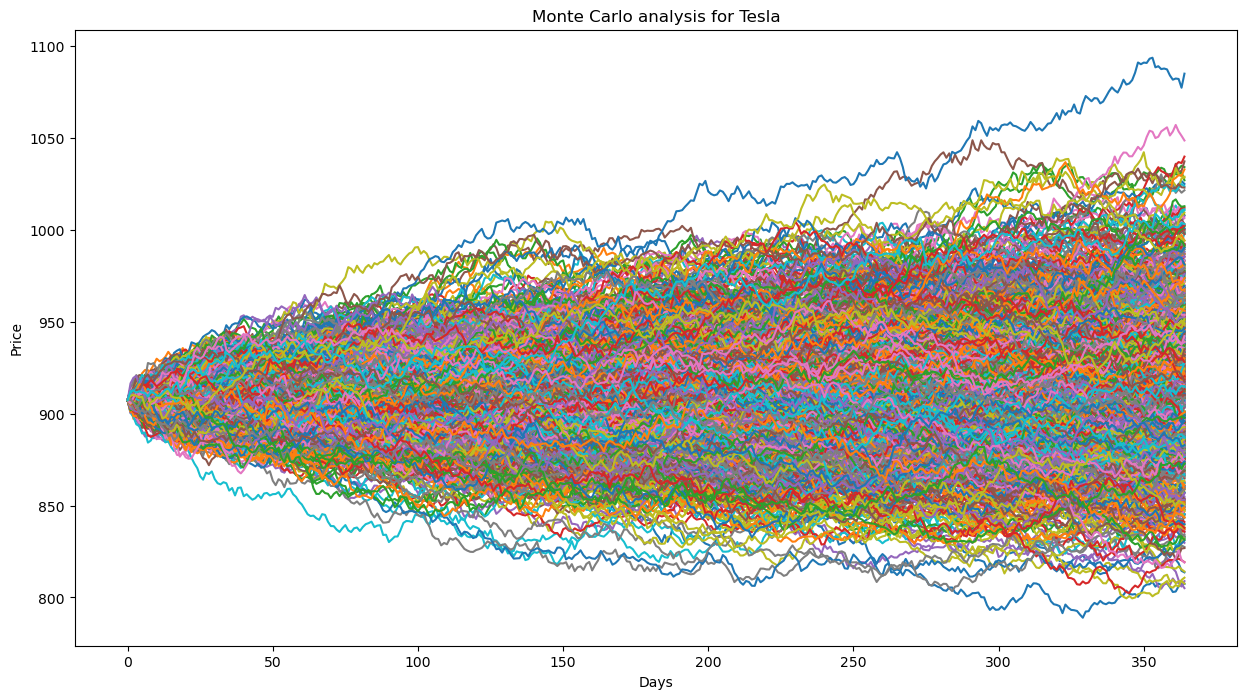

In [47]:
start_price = 907.34
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TSLA'], sigma['TSLA'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Tesla')

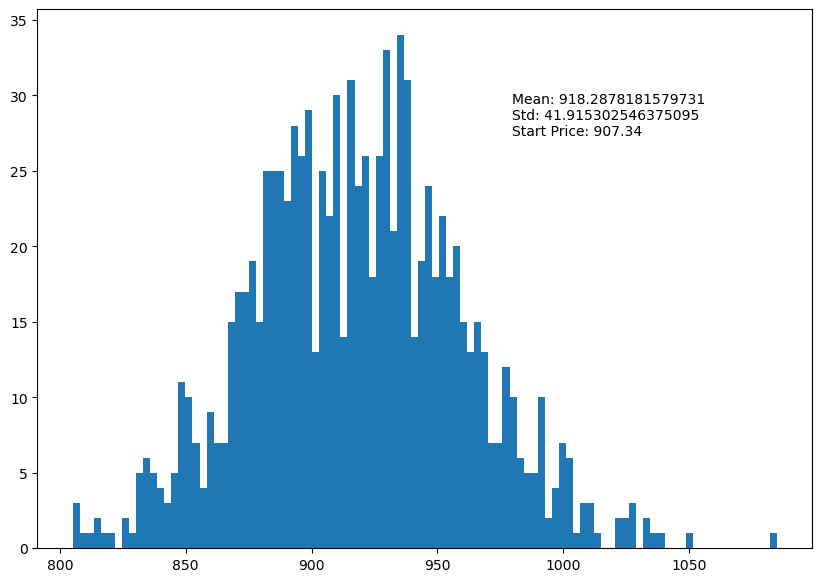

In [48]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

# Using MCMC (Bayesian Approach)

In [43]:
import numpy as np
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import yfinance as yf
from jax import random

# Function to download historical stock price data
def download_stock_data(symbols, start_date, end_date):
    data = yf.download(symbols, start=start_date, end=end_date)['Close']
    return data



def initialize_mcmc(init_data, num_chains):
    rng_key = random.PRNGKey(0)
    rng_keys = random.split(rng_key, num_chains)

    # Ensure init_data has a shape with at least one dimension
    init_data = init_data.reshape((init_data.size, 1))

    # Create dictionary of initial parameters
    init_params = {'returns': np.zeros_like(init_data)}

    return init_params, rng_keys

# Function to perform MCMC simulation
def model(init_data):
    mu = numpyro.param('mu', init_data.mean())
    sigma = numpyro.param('sigma', np.std(init_data))
    mask = ~np.isnan(init_data)  # Create a mask for non-NaN values
    returns = numpyro.sample('returns', dist.Normal(mu, sigma).mask(mask), obs=init_data)

# Function to simulate portfolio using MCMC
def simulate_portfolio_mcmc(symbols, start_date, end_date, num_samples=1000, future_days=30):
    # Download stock data for the specified symbols and date range
    data = download_stock_data(symbols, start_date, end_date)
    
    # Ensure init_data has a shape with at least one dimension
    init_data = np.log(data / data.shift(1)).values
    init_data = init_data.reshape((init_data.size, 1))

    # Replace NaN values with zeros
    init_data = np.nan_to_num(init_data)

    print("Init data shape:", init_data.shape)
    print("Init data:", init_data)

    # Initialize MCMC parameters
    init_params = {'returns': np.zeros((init_data.shape[0], len(symbols)))}

    print("Init params:", init_params)

    mcmc = MCMC(NUTS(model), num_samples=num_samples, num_warmup=1000)
    mcmc.run(rng_key=random.PRNGKey(0), init_data=init_data, init_params=init_params)

    # Simulate future stock prices for each stock
    future_returns = mcmc.get_samples()['returns']
    future_prices = np.exp(np.cumsum(future_returns, axis=0))

    return data, future_prices

# Example usage
symbols = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
start_date = '2020-01-01'
end_date = '2021-12-31'
num_samples = 10
future_days = 700

stock_data1, future_prices1 = simulate_portfolio_mcmc(symbols, start_date, end_date, num_samples, future_days)


[*********************100%%**********************]  4 of 4 completed
Init data shape: (2016, 1)
Init data: [[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 ...
 [-0.00329443]
 [-0.00772093]
 [-0.01469978]]
Init params: {'returns': array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])}


sample: 100%|█| 1010/1010 [00:04<00:00, 203.17it/s, 31 steps of size 1.67e-01. a


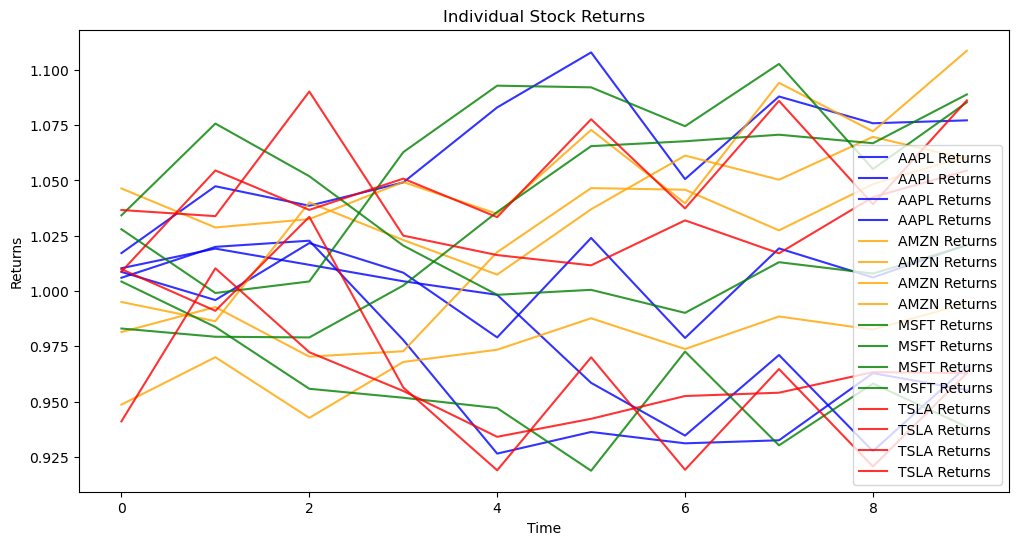

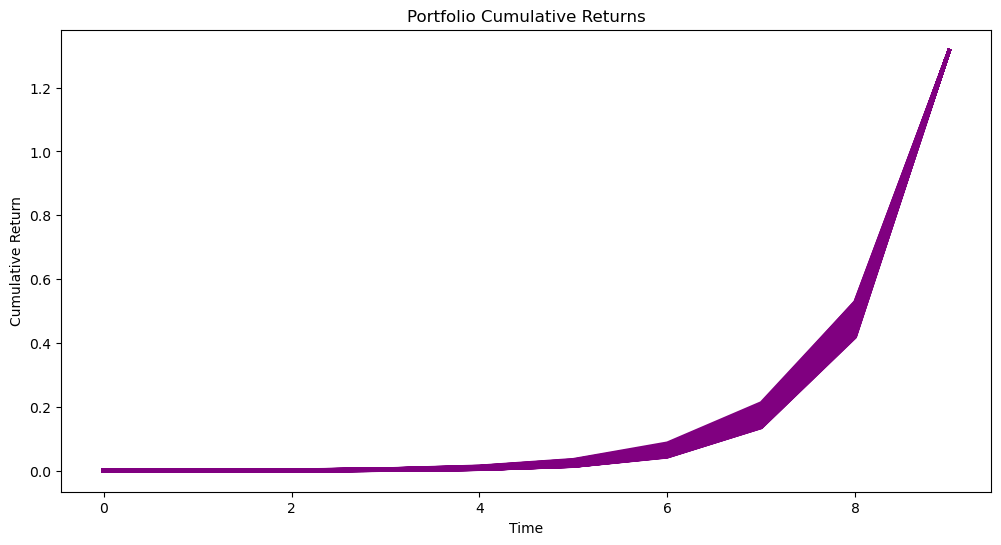

Optimal Portfolio (Highest Cumulative Return):
Index: 18144
Cumulative Returns Shape: (10, 2016)
Index out of bounds for cumulative_returns.
Allocation Weights: [0.25 0.25 0.25 0.25]

Stocks in Descending Order based on Total Returns:
Rank 1: TSLA - Cumulative Return: 4.5168585777282715 - Total Returns: 0.5104269981384277
Rank 2: MSFT - Cumulative Return: 1.6504768133163452 - Total Returns: 0.2128465175628662
Rank 3: AMZN - Cumulative Return: 0.6035277247428894 - Total Returns: 0.32972633838653564
Rank 4: AAPL - Cumulative Return: 0.22136472165584564 - Total Returns: 0.06265914440155029

Total Portfolio Profit: 1.1156589984893799


In [45]:
import matplotlib.pyplot as plt

# Function to calculate portfolio returns and cumulative returns
def calculate_portfolio_returns(stock_data, future_prices):
    # Calculate daily portfolio returns
    portfolio_returns = np.mean(future_prices, axis=2)

    # Calculate cumulative returns
    cumulative_returns = np.exp(np.cumsum(portfolio_returns, axis=0))

    # Normalize cumulative returns
    max_cumulative_return = np.max(cumulative_returns, axis=0)
    cumulative_returns /= max_cumulative_return

    return portfolio_returns, cumulative_returns

# Function to visualize the results
def visualize_results(stock_data, future_prices, portfolio_returns, cumulative_returns):
    # Define colors for each stock
    colors = ['blue', 'orange', 'green', 'red']

    # Plot individual stock returns with the same y-axis scale as cumulative returns
    plt.figure(figsize=(12, 6))
    symbols = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
    for i, symbol in enumerate(symbols):
        plt.plot(future_prices[:, i] * np.max(cumulative_returns), label=f'{symbol} Returns', color=colors[i], alpha=0.8)

    plt.title('Individual Stock Returns')
    plt.xlabel('Time')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()

    # Plot portfolio cumulative returns with the same y-axis scale as individual stock returns
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_returns * np.max(future_prices), label='Portfolio', color='purple', linestyle='-', linewidth=2.5)
    plt.title('Portfolio Cumulative Returns')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Return')
    plt.legend().set_visible(False)  # Remove legend
    plt.show()

# Calculate portfolio returns and cumulative returns
portfolio_returns, cumulative_returns = calculate_portfolio_returns(stock_data1, future_prices1)

# Visualize the results
visualize_results(stock_data1, future_prices1, portfolio_returns, cumulative_returns)

# Identify the optimal portfolio
optimal_portfolio_index = np.argmax(cumulative_returns)
optimal_portfolio_weights = 1 / len(symbols) * np.ones(len(symbols))

print(f"Optimal Portfolio (Highest Cumulative Return):")
print(f"Index: {optimal_portfolio_index}")

# Check dimensions of cumulative_returns
print(f"Cumulative Returns Shape: {cumulative_returns.shape}")

# Print Cumulative Return if the index is within bounds
if 0 <= optimal_portfolio_index < cumulative_returns.shape[0]:
    print(f"Cumulative Return: {cumulative_returns[optimal_portfolio_index]}")
else:
    print("Index out of bounds for cumulative_returns.")

print(f"Allocation Weights: {optimal_portfolio_weights}")

# Create a list of tuples containing symbols and corresponding cumulative returns
stock_returns = list(zip(symbols, cumulative_returns))

# Sort the list in ascending order based on cumulative return
ranked_stock_returns = sorted(stock_returns, key=lambda x: np.sum(x[1]), reverse=True)

# Print stocks in descending order based on total returns
print("\nStocks in Descending Order based on Total Returns:")
total_profit = 0
for rank, (symbol, cumulative_return) in enumerate(ranked_stock_returns, start=1):
    returns = future_prices1[:, symbols.index(symbol), -1] - 1
    total_returns = np.sum(returns)
    total_profit += total_returns
    print(f"Rank {rank}: {symbol} - Cumulative Return: {np.sum(cumulative_return)} - Total Returns: {total_returns}")

# Print total profit of the portfolio
print(f"\nTotal Portfolio Profit: {total_profit}")